In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from random import sample, seed

In [66]:
Hubble_h = 0.73
BoxSize = ((62.5**3) * (8/8))**(1/3)
#BoxSize = ((500**3) * (32/512))**(1/3)
dilute = 5000
sSFRcut = -11.0

In [67]:
directory = '../src/auxdata/trees/play/'
filename = 'model'
redshift = [0.000, 1.386, 2.070, 3.060, 4.179, 5.289, 6.197, 7.272]
#redshift = [0.000]
firstfile = 0
lastfile = 7
MaxTreeFiles = lastfile - firstfile + 1

In [5]:
def galdtype():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [6]:
def galdtype1():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('Pressure'                     , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('Dust'                         , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('Sfr'                          , (np.float32, 64)),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [7]:
def galdtype2():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('Pressure'                     , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('ColdDust'                     , np.float32),
        ('HotDust'                      , np.float32),
        ('EjectedDust'                     , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('dustdotform'                  , np.float32),
        ('dustdotgrowth'                    , np.float32),
        ('dustdotdestruct'                    , np.float32),
        ('Sfr'                          , (np.float32, 64)),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [56]:
def read_one_file(name, Galdesc):
    fin = open(name, 'rb')
    Ntrees = np.fromfile(fin,np.dtype(np.int32),1)[0]
    NtotGals = np.fromfile(fin,np.dtype(np.int32),1)[0]
    GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1)[0]
    G = np.fromfile(fin, Galdesc, NtotGals)
    G = G.view(recarray)
    return G

In [68]:
Galdesc = galdtype2()
#Galdesc1 = galdtype1()
#Galdesc2 = galdtype2()

G_history = [0]*len(redshift)
for i in range(len(redshift)):
    G_snap = []
    G_snap1 = []
    G_snap2 = []
    GalsTree = []
    
    goodfile = 0
    for k in range(firstfile, lastfile+1):
        name = (directory+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{k}')
        G = read_one_file(name, Galdesc)
        G_snap.extend(G)
        
    G_snap = np.array(G_snap)
    G_snap = G_snap.view(recarray)
    
    G_history[i] = G_snap


In [51]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

# Allresults

## Stellar Mass Function

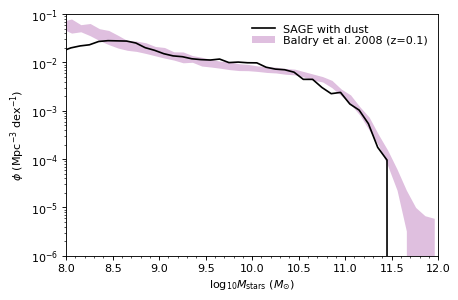

In [69]:
plt.figure()
ax = plt.subplot(111)

binwidth = 0.1

w = np.where(G_history[0].StellarMass > 0.0)[0]
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
#w1 = np.where(G_history[0]1.StellarMass > 0.0)[0]
#mass1 = np.log10(G_history[0]1.StellarMass[w1] * 1.e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
#ma = np.floor(max(mass)) + 2
ma = 14
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
#(counts1, binedges1) = np.histogram(mass1, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
#xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='SAGE with dust')
#plt.plot(xaxeshisto1, counts1/ (BoxSize/Hubble_h)**3 / binwidth, 'k:', label='new metals & dust model')

# Baldry+ 2008 modified data used for the MCMC fitting
Baldry = np.array([
            [7.05, 1.3531e-01, 6.0741e-02],
            [7.15, 1.3474e-01, 6.0109e-02],
            [7.25, 2.0971e-01, 7.7965e-02],
            [7.35, 1.7161e-01, 3.1841e-02],
            [7.45, 2.1648e-01, 5.7832e-02],
            [7.55, 2.1645e-01, 3.9988e-02],
            [7.65, 2.0837e-01, 4.8713e-02],
            [7.75, 2.0402e-01, 7.0061e-02],
            [7.85, 1.5536e-01, 3.9182e-02],
            [7.95, 1.5232e-01, 2.6824e-02],
            [8.05, 1.5067e-01, 4.8824e-02],
            [8.15, 1.3032e-01, 2.1892e-02],
            [8.25, 1.2545e-01, 3.5526e-02],
            [8.35, 9.8472e-02, 2.7181e-02],
            [8.45, 8.7194e-02, 2.8345e-02],
            [8.55, 7.0758e-02, 2.0808e-02],
            [8.65, 5.8190e-02, 1.3359e-02],
            [8.75, 5.6057e-02, 1.3512e-02],
            [8.85, 5.1380e-02, 1.2815e-02],
            [8.95, 4.4206e-02, 9.6866e-03],
            [9.05, 4.1149e-02, 1.0169e-02],
            [9.15, 3.4959e-02, 6.7898e-03],
            [9.25, 3.3111e-02, 8.3704e-03],
            [9.35, 3.0138e-02, 4.7741e-03],
            [9.45, 2.6692e-02, 5.5029e-03],
            [9.55, 2.4656e-02, 4.4359e-03],
            [9.65, 2.2885e-02, 3.7915e-03],
            [9.75, 2.1849e-02, 3.9812e-03],
            [9.85, 2.0383e-02, 3.2930e-03],
            [9.95, 1.9929e-02, 2.9370e-03],
            [10.05, 1.8865e-02, 2.4624e-03],
            [10.15, 1.8136e-02, 2.5208e-03],
            [10.25, 1.7657e-02, 2.4217e-03],
            [10.35, 1.6616e-02, 2.2784e-03],
            [10.45, 1.6114e-02, 2.1783e-03],
            [10.55, 1.4366e-02, 1.8819e-03],
            [10.65, 1.2588e-02, 1.8249e-03],
            [10.75, 1.1372e-02, 1.4436e-03],
            [10.85, 9.1213e-03, 1.5816e-03],
            [10.95, 6.1125e-03, 9.6735e-04],
            [11.05, 4.3923e-03, 9.6254e-04],
            [11.15, 2.5463e-03, 5.0038e-04],
            [11.25, 1.4298e-03, 4.2816e-04],
            [11.35, 6.4867e-04, 1.6439e-04],
            [11.45, 2.8294e-04, 9.9799e-05],
            [11.55, 1.0617e-04, 4.9085e-05],
            [11.65, 3.2702e-05, 2.4546e-05],
            [11.75, 1.2571e-05, 1.2571e-05],
            [11.85, 8.4589e-06, 8.4589e-06],
            [11.95, 7.4764e-06, 7.4764e-06],
            ], dtype=np.float32)

Baldry_xval = np.log10(10 ** Baldry[:, 0]  /Hubble_h/Hubble_h)
Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h

plt.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, facecolor='purple', alpha=0.25, label='Baldry et al. 2008 (z=0.1)')

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 12.0, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/SMF-dust-mini.png')
plt.show()

In [73]:
HI_rr, Z_rr, H2_rr, atomic_rr, logdust_rr, logdust2_rr, dustpercent_rr, logstar_rr = np.loadtxt('remy-ruyers.txt', usecols=(1,3,4,6,9,7,8,10), unpack=True)

gas = atomic_rr* (HI_rr + H2_rr)
dust_rr = 10 ** logdust_rr
dust2_rr = 10 ** logdust2_rr
dusterr_rr = dustpercent_rr* dust_rr / 100
star_rr = 10 ** logstar_rr

w1 = np.where(gas > 0)[0]
Z_rr = Z_rr[w1]
gas_rr = gas[w1]
DTG_rr = np.log10(dust_rr[w1] / gas[w1])
logstar_rr = logstar_rr[w1]
logdust_rr = logdust_rr[w1]

In [21]:
'''
plt.errorbar(star_rr, dust_rr, dusterr_rr, fmt='k.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e7, 1e12)
plt.ylim(1e4, 1e10)
'''


"\nplt.errorbar(star_rr, dust_rr, dusterr_rr, fmt='k.')\nplt.xscale('log')\nplt.yscale('log')\nplt.xlim(1e7, 1e12)\nplt.ylim(1e4, 1e10)\n"

<ErrorbarContainer object of 3 artists>

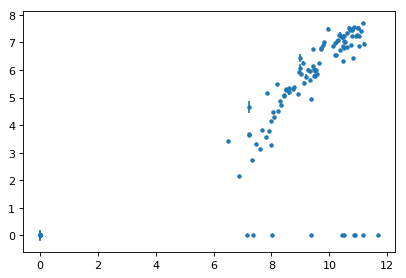

In [22]:
logdusterr_rr = np.log10((dusterr_rr + dust_rr) / dust_rr)
plt.errorbar(np.log10(star_rr), np.log10(dust_rr), np.log10((dusterr_rr + dust_rr) / dust_rr), fmt='.')

## Dust - Stellar Mass

/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


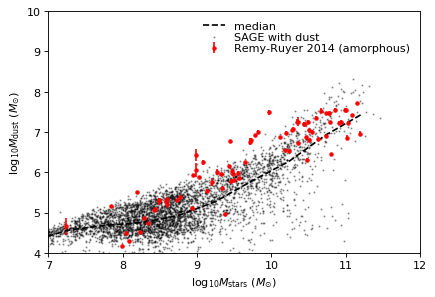

In [76]:
plt.figure()
ax = plt.subplot(111)

w = np.where((G_history[0].StellarMass > 0) & (G_history[0].ColdDust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
dust = np.log10(G_history[0].ColdDust[w] * 1.e10 / Hubble_h)

total_bins = 20
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
tesmedian = [np.median(dust[idx==k]) for k in range(total_bins)]

plt.scatter(mass, dust, marker='o', s=1, c='k', alpha=0.3, label='SAGE with dust')
plt.plot(bins-delta/2, tesmedian, 'k--', label='median')

plt.errorbar(np.log10(star_rr), np.log10(dust_rr), np.log10((dusterr_rr + dust_rr) / dust_rr), fmt='r.', label="Remy-Ruyer 2014 (amorphous)")
#plt.scatter(np.log10(star_rr), np.log10(dust2_rr), marker='.', c='b', label='Remy-Ruyer 2014 (graphite)')
plt.xlim(7, 12)
plt.ylim(4, 10)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels
plt.ylabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/dust-mass-mini.png')

## DTG - Z

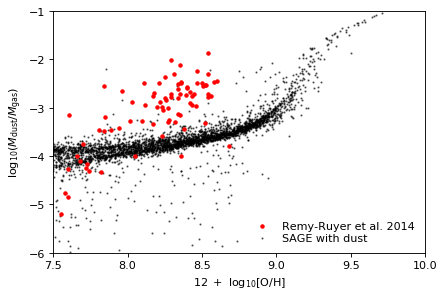

In [77]:
plt.figure()
ax = plt.subplot(111)

w = np.where((G_history[0].MetalsColdGas > 0) & (G_history[0].ColdDust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)

Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0
DTG = np.log10(G_history[0].ColdDust[w]/G_history[0].ColdGas[w])

plt.scatter(Z, DTG, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')
plt.plot(Z_rr, DTG_rr, 'r.', label='Remy-Ruyer et al. 2014')
plt.xlim(7.5, 10)
plt.ylim(-6, -1)
plt.xlabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
#print(max(DTG))

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/DTG-mini.png')

## DTG - Mass

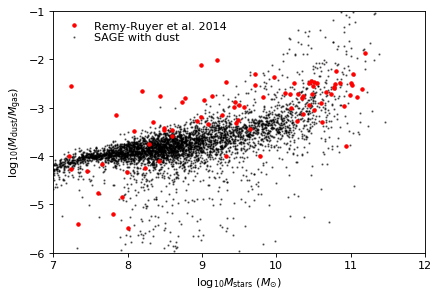

In [78]:
seed(2222)
plt.figure()
ax = plt.subplot(111)

w = np.where((G_history[0].MetalsColdGas > 0) & (G_history[0].ColdDust > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
DTG = np.log10(G_history[0].ColdDust[w]/G_history[0].ColdGas[w])

plt.scatter(mass, DTG, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')
plt.plot(logstar_rr, DTG_rr, 'r.' , label='Remy-Ruyer et al. 2014')

plt.xlim(7, 12)
plt.ylim(-6, -1)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
#print(max(DTG))
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/DTG-mass-mini.png')

## Dust Mass Function

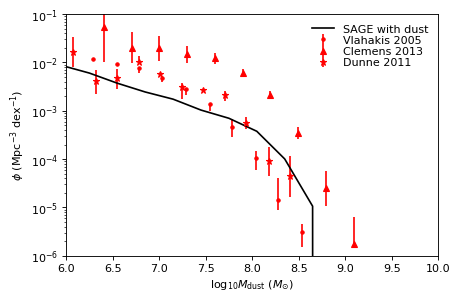

In [79]:
plt.figure()
ax = plt.subplot(111)

binwidth = 0.3

w = np.where(G_history[0].ColdDust > 0.0)[0]
mass = np.log10(G_history[0].ColdDust[w] * 1.e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
ma = np.floor(max(mass)) + 2
#ma = 10
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='SAGE with dust')

vlahakis_x = np.array([6.289, 6.543, 6.788, 7.034, 7.287, 7.542, 7.787, 8.038, 8.282, 8.536])
vlahakis_y = np.array([-1.928, -2.033, -2.122, -2.329, -2.554, -2.859, -3.344, -3.979, -4.844, -5.507])
vlahakis_yerr = np.array([(0.0, 0), (0.0, 0.0), (0.097, 0), (0.081, 0), (0.122, 0), (0.149, 0), (0.205, 0.177), (0.246, 0.138), (0.216, 0.448), (0.301, 0.163)]).T
vlahakis_yerr[0] = 10**vlahakis_y - 10**(vlahakis_y - vlahakis_yerr[0])
vlahakis_yerr[1] = 10**(vlahakis_y + vlahakis_yerr[1]) - 10**vlahakis_y
plt.errorbar(vlahakis_x, 10**vlahakis_y, vlahakis_yerr, fmt='r.', label='Vlahakis 2005')

clemens_x = np.array([6.405, 6.706, 7.003, 7.304, 7.605, 7.903, 8.196, 8.497, 8.798, 9.096])
clemens_y = np.array([-1.27, -1.696, -1.697, -1.829, -1.917, -2.212, -2.676, -3.454, -4.607, -5.749])
clemens_yerr = np.array([(0.719, 0.281), (0.322, 0.319), (0.273, 0.239), (0.186, 0.166), (0.112, 0.104), (0.094, 0.073), (0.0, 0.093), (0.126, 0.114), (0.361, 0.364), (0.0, 0.545)]).T
clemens_yerr[0] = 10**clemens_y - 10**(clemens_y - clemens_yerr[0])
clemens_yerr[1] = 10**(clemens_y + clemens_yerr[1]) - 10**clemens_y
plt.errorbar(clemens_x, 10**clemens_y, clemens_yerr, fmt='r^', label='Clemens 2013')

dunne_x = np.array([6.071, 6.318, 6.546, 6.784, 7.011, 7.243, 7.470, 7.711, 7.931, 8.178, 8.409])
dunne_y = np.array([-1.778, -2.391, -2.320, -1.991, -2.234, -2.517, -2.568, -2.675, -3.248, -4.048, -4.356])
dunne_yerr = np.array([(0.313, 0.313), (0.258, 0.234), (0.229, 0.188), (0.0, 0.117), (0.0, 0.0), (0.233, 0.083), (0.0, 0.0), (0.112, 0.082), (0.124, 0.118), (0.309, 0.301), (0.433, 0.431)]).T
dunne_yerr[0] = 10**dunne_y - 10**(dunne_y - dunne_yerr[0])
dunne_yerr[1] = 10**(dunne_y + dunne_yerr[1]) - 10**dunne_y
plt.errorbar(dunne_x, 10**dunne_y, dunne_yerr, fmt='r*', label='Dunne 2011')

plt.yscale('log', nonposy='clip')
plt.axis([6.0, 10.0, 1.0e-6, 1.0e-1])

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/DMF-mini.png')

In [19]:
w = np.where(G_snap2.ColdDust > 0)[0]
mass2 = np.log10(G_snap2.ColdDust[w] * 1.e10 / Hubble_h)
min(G_snap2.ColdDust * 1.e10 / Hubble_h)

AttributeError: 'list' object has no attribute 'ColdDust'

## Baryonic Mass Function

In [ ]:
plt.figure ()
ax = plt.subplot(111)

binwidth = 0.1

w = np.where(G_history[0].StellarMass + G_history[0].ColdGas > 0.0)[0]
mass = np.log10((G_history[0].StellarMass[w] + G_history[0].ColdGas[w]) * 1.0e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
ma = np.floor(max(mass)) + 2
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='SAGE with dust')

# Bell et al. 2003 BMF (h=1.0 converted to h=0.73)
M = np.arange(7.0, 13.0, 0.01)
Mstar = np.log10(5.3*1.0e10 /Hubble_h/Hubble_h)
alpha = -1.21
phistar = 0.0108 * Hubble_h**3
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
plt.plot(np.log10(10.0**M /0.7 /1.8), yval, 'g--', lw=1.5, label='Bell et al. 2003')  # Plot the SMF

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10}\ M_{\mathrm{bar}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/BMF-mini.png')
plt.show()

## Gas Mass Function

In [ ]:
plt.figure ()
ax = plt.subplot(111)

binwidth = 0.15

w = np.where(G_history[0].ColdGas > 0.0)[0]
mass = np.log10(G_history[0].ColdGas[w] * 1.0e10 / Hubble_h)
H2 = np.log10(G_history[0].f_H2[w] * G_history[0].ColdGas[w] * 1.0e10 / Hubble_h)
HI = np.log10(G_history[0].f_HI[w] * G_history[0].ColdGas[w] * 1.0e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
ma = np.floor(max(mass)) + 2
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
(counts2, binedges2) = np.histogram(H2, range=(mi, ma), bins=NB)
(counts3, binedges3) = np.histogram(HI, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
xaxeshisto2 = binedges2[:-1] + 0.5 * binwidth
xaxeshisto3 = binedges3[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='Cold gas')
plt.plot(xaxeshisto2, counts2/ (BoxSize/Hubble_h)**3 / binwidth, 'b-', label='H2')
plt.plot(xaxeshisto3, counts3/ (BoxSize/Hubble_h)**3 / binwidth, 'r-', label='HI')

Zwaan = np.array([[6.933,   -0.333],
            [7.057,   -0.490],
            [7.209,   -0.698],
            [7.365,   -0.667],
            [7.528,   -0.823],
            [7.647,   -0.958],
            [7.809,   -0.917],
            [7.971,   -0.948],
            [8.112,   -0.927],
            [8.263,   -0.917],
            [8.404,   -1.062],
            [8.566,   -1.177],
            [8.707,   -1.177],
            [8.853,   -1.312],
            [9.010,   -1.344],
            [9.161,   -1.448],
            [9.302,   -1.604],
            [9.448,   -1.792],
            [9.599,   -2.021],
            [9.740,   -2.406],
            [9.897,   -2.615],
            [10.053,  -3.031],
            [10.178,  -3.677],
            [10.335,  -4.448],
            [10.492,  -5.083]        ], dtype=np.float32)
        
ObrRaw = np.array([
            [7.300,   -1.104],
            [7.576,   -1.302],
            [7.847,   -1.250],
            [8.133,   -1.240],
            [8.409,   -1.344],
            [8.691,   -1.479],
            [8.956,   -1.792],
            [9.231,   -2.271],
            [9.507,   -3.198],
            [9.788,   -5.062 ]        ], dtype=np.float32)

ObrCold = np.array([
            [8.009,   -1.042],
            [8.215,   -1.156],
            [8.409,   -0.990],
            [8.604,   -1.156],
            [8.799,   -1.208],
            [9.020,   -1.333],
            [9.194,   -1.385],
            [9.404,   -1.552],
            [9.599,   -1.677],
            [9.788,   -1.812],
            [9.999,   -2.312],
            [10.172,  -2.656],
            [10.362,  -3.500],
            [10.551,  -3.635],
            [10.740,  -5.010]        ], dtype=np.float32)

ObrCold_xval = np.log10(10**(ObrCold[:, 0])  /Hubble_h/Hubble_h)
ObrCold_yval = (10**(ObrCold[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
Zwaan_xval = np.log10(10**(Zwaan[:, 0]) /Hubble_h/Hubble_h)
Zwaan_yval = (10**(Zwaan[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
ObrRaw_xval = np.log10(10**(ObrRaw[:, 0])  /Hubble_h/Hubble_h)
ObrRaw_yval = (10**(ObrRaw[:, 1]) * Hubble_h*Hubble_h*Hubble_h)

plt.plot(ObrCold_xval, ObrCold_yval, color='black', lw = 7, alpha=0.25, label='Obr. & Raw. 2009 (Cold Gas)')
plt.plot(Zwaan_xval, Zwaan_yval, color='red', lw = 7, alpha=0.25, label='Zwaan et al. 2005 (HI)')
plt.plot(ObrRaw_xval, ObrRaw_yval, color='blue', lw = 7, alpha=0.25, label='Obr. & Raw. 2009 (H2)')

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 11.5, 1.0e-6, 1.0e-1])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')
plt.xlabel(r'$\log_{10} M_{\mathrm{X}}\ (M_{\odot})$')

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/GMF-mini.png')    
plt.show()

## Baryonic Tully-Fisher

In [ ]:
seed(2222)
plt.figure()
ax = plt.subplot(111)

w = np.where((G_history[0].Type == 0) & (G_history[0].StellarMass + G_history[0].ColdGas > 0.0) &
            (G_history[0].BulgeMass / G_history[0].StellarMass > 0.1) & (G_history[0].BulgeMass / G_history[0].StellarMass > 0.5))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10((G_history[0].ColdGas[w] + G_history[0].StellarMass[w] )* 1.0e10 / Hubble_h)
vel = np.log10(G_history[0].Vmax[w])

plt.scatter(vel, mass, marker='o', s=1, c='k', alpha=0.5, label='Model Sb/c galaxies')

# overplot Stark, McGaugh & Swatters 2009 (assumes h=0.75? ... what IMF?)
w = np.arange(0.5, 10.0, 0.5)
TF = 3.94*w + 1.79
plt.plot(w, TF, 'b-', lw=2.0, label='Stark, McGaugh \& Swatters 2009')

plt.ylabel(r'$\log_{10}\ M_{\mathrm{bar}}\ (M_{\odot})$')
plt.xlabel(r'$\log_{10}V_{max}\ (km/s)$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([1.4, 2.6, 8.0, 12.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/GTF-mini.png')    
plt.show()

## Specific SFR

In [ ]:
seed(2222)

plt.figure()
ax = plt.subplot(111)

w = np.where(G_history[0].StellarMass > 0.01)[0]
if(len(w) > dilute): w = sample(list(w), dilute)
print(len(w))
mass = np.log10(G_history[0].StellarMass[w] * 1.0e10 / Hubble_h)
sSFR = np.log10( (G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]) / (G_history[0].StellarMass[w] * 1.0e10 / Hubble_h) )
plt.scatter(mass, sSFR, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')

# overplot dividing line between SF and passive
w = np.arange(7.0, 13.0, 1.0)
plt.plot(w, w/w*sSFRcut, 'b:', lw=2.0)

plt.ylabel(r'$\log_{10}\ s\mathrm{SFR}\ (\mathrm{yr^{-1}})$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, -16.0, -8.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/sSFR-mini.png')    
plt.show()

## Gas Fraction

In [ ]:
seed(2222)

w = np.where((G_history[0].Type == 0) & (G_history[0].StellarMass + G_history[0].ColdGas > 0.0) &
            (G_history[0].BulgeMass / G_history[0].StellarMass > 0.1) & (G_history[0].BulgeMass / G_history[0].StellarMass > 0.5))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w]* 1.0e10 / Hubble_h)
fraction = G_history[0].ColdGas[w] / (G_history[0].StellarMass[w] + G_history[0].ColdGas[w])

plt.scatter(mass, fraction, marker='o', s=1, c='k', alpha=0.5, label='Sb/c galaxies')

plt.ylabel(r'$\mathrm{Cold\ Mass\ /\ (Cold+Stellar\ Mass)}$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 0.0, 1.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/GasFraction-minipng')    
plt.show()

## Metallicity

In [ ]:
seed(2222)

w = np.where((G_history[0].Type == 0) & ( G_history[0].ColdGas / (G_history[0].StellarMass + G_history[0].ColdGas) > 0.0) &
            (G_history[0].StellarMass > 0.01))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w]* 1.0e10 / Hubble_h)
Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0

plt.scatter(mass, Z, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')

# overplot Tremonti et al. 2003 (h=0.7)
w = np.arange(7.0, 13.0, 0.1)
Zobs = -1.492 + 1.847*w - 0.08026*w*w
plt.plot(np.log10((10**w *1.5 /1.8)), Zobs, 'b-', lw=2.0, label='Tremonti et al. 2003')

plt.ylabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 8.0, 9.5])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/Metallicity-mini.png')
plt.show()

## Blackhole Bulge Relationship

In [ ]:
seed(2222)

w = np.where((G_history[0].BulgeMass > 0.01) & (G_history[0].BlackHoleMass > 0.00001))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
bh = np.log10(G_history[0].BlackHoleMass[w] * 1.0e10 / Hubble_h)
bulge = np.log10(G_history[0].BulgeMass[w] * 1.0e10 / Hubble_h)

plt.scatter(bulge, bh, marker='o', s=1, c='k', alpha=0.5, label='default')

# overplot Haring & Rix 2004
w = 10. ** np.arange(20)
BHdata = 10. ** (8.2 + 1.12 * np.log10(w / 1.0e11))
plt.plot(np.log10(w), np.log10(BHdata), 'b-', label="Haring \& Rix 2004")

plt.ylabel(r'$\log\ M_{\mathrm{BH}}\ (M_{\odot})$')  # Set the y...
plt.xlabel(r'$\log\ M_{\mathrm{bulge}}\ (M_{\odot})$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 6.0, 10.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/BBR-mini.png')
plt.show()

## Quiescent Fraction

In [ ]:
seed(2222)

groupscale = 12.5

w = np.where(G_history[0].StellarMass > 0.0)[0]
StellarMass = np.log10(G_history[0].StellarMass[w] * 1.0e10 / Hubble_h)
CentralMvir = np.log10(G_history[0].CentralMvir[w] * 1.0e10 / Hubble_h)
Type = G_history[0].Type[w]
sSFR = (G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]) / (G_history[0].StellarMass[w] * 1.0e10 / Hubble_h)

MinRange = 9.5
MaxRange = 12.0
Interval = 0.1
Nbins = int((MaxRange-MinRange)/Interval)
Range = np.arange(MinRange, MaxRange, Interval)
        
Mass = []
Fraction = []
CentralFraction = []
SatelliteFraction = []
SatelliteFractionLo = []
SatelliteFractionHi = []

for i in range(Nbins-1):
            
    w = np.where((StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        Fraction.append(1.0*len(wQ) / len(w))
    else:
        Fraction.append(0.0)

    w = np.where((Type == 0) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((Type == 0) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        CentralFraction.append(1.0*len(wQ) / len(w))
    else:
        CentralFraction.append(0.0)

    w = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        SatelliteFraction.append(1.0*len(wQ) / len(w))
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut) & (CentralMvir < groupscale))[0]
        SatelliteFractionLo.append(1.0*len(wQ) / len(w))
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut) & (CentralMvir > groupscale))[0]
        SatelliteFractionHi.append(1.0*len(wQ) / len(w))                
    else:
        SatelliteFraction.append(0.0)
        SatelliteFractionLo.append(0.0)
        SatelliteFractionHi.append(0.0)
                
    Mass.append((Range[i] + Range[i+1]) / 2.0)

        
Mass = np.array(Mass)
Fraction = np.array(Fraction)
CentralFraction = np.array(CentralFraction)
SatelliteFraction = np.array(SatelliteFraction)
SatelliteFractionLo = np.array(SatelliteFractionLo)
SatelliteFractionHi = np.array(SatelliteFractionHi)

w = np.where(Fraction > 0)[0]
plt.plot(Mass[w], Fraction[w], c='k', label='All')

w = np.where(CentralFraction > 0)[0]
plt.plot(Mass[w], CentralFraction[w], color='Blue', label='Centrals')

w = np.where(SatelliteFraction > 0)[0]
plt.plot(Mass[w], SatelliteFraction[w], color='Red', label='Satellites')

w = np.where(SatelliteFractionLo > 0)[0]
plt.plot(Mass[w], SatelliteFractionLo[w], 'r--', label='Satellites-Lo')

w = np.where(SatelliteFractionHi > 0)[0]
plt.plot(Mass[w], SatelliteFractionHi[w], 'r-.', label='Satellites-Hi')


plt.xlabel(r'$\log_{10} M_{\mathrm{stellar}}\ (M_{\odot})$')  # Set the x-axis label
plt.ylabel(r'$\mathrm{Quescient\ Fraction}$')  # Set the y-axis label
            
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
            
plt.axis([9.5, 11.2, 0.0, 1.05])

leg = plt.legend(loc='lower right')
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/QuiescentFraction-mini.png')

## Baryon Fraction

In [ ]:
seed(2222)

HaloMass = np.log10(G_history[0].Mvir * 1.0e10 / Hubble_h)
Baryons = G_history[0].StellarMass + G_history[0].ColdGas + G_history[0].HotGas + G_history[0].EjectedMass + G_history[0].IntraClusterStars + G_history[0].BlackHoleMass

MeanCentralHaloMass = []
MeanBaryonFraction = []
MeanBaryonFractionU = []
MeanBaryonFractionL = []

MeanStars = []
MeanCold = []
MeanHot = []
MeanEjected = []
MeanICS = []
MeanBH = []

MinHalo = 11.0
MaxHalo = 16.0
Interval = 0.1
Nbins = int((MaxHalo-MinHalo)/Interval)
HaloRange = np.arange(MinHalo, MaxHalo, Interval)

for i in range(Nbins-1):
    w1 = np.where((G_history[0].Type == 0) & (HaloMass >= HaloRange[i]) & (HaloMass < HaloRange[i+1]))[0]
    HalosFound = len(w1)

    if HalosFound > 2:
        
        BaryonFraction = []
        CentralHaloMass = []
                
        Stars = []
        Cold = []
        Hot = []
        Ejected = []
        ICS = []
        BH = []
        
        for j in range(HalosFound):
                    
            w2 = np.where(G_history[0].CentralGalaxyIndex == G_history[0].CentralGalaxyIndex[w1[j]])[0]
            CentralAndSatellitesFound = len(w2)
                    
            if CentralAndSatellitesFound > 0:
                BaryonFraction.append(sum(Baryons[w2]) / G_history[0].Mvir[w1[j]])
                CentralHaloMass.append(np.log10(G_history[0].Mvir[w1[j]] * 1.0e10 / Hubble_h))

                Stars.append(sum(G_history[0].StellarMass[w2]) / G_history[0].Mvir[w1[j]])
                Cold.append(sum(G_history[0].ColdGas[w2]) / G_history[0].Mvir[w1[j]])
                Hot.append(sum(G_history[0].HotGas[w2]) / G_history[0].Mvir[w1[j]])
                Ejected.append(sum(G_history[0].EjectedMass[w2]) / G_history[0].Mvir[w1[j]])
                ICS.append(sum(G_history[0].IntraClusterStars[w2]) / G_history[0].Mvir[w1[j]])
                BH.append(sum(G_history[0].BlackHoleMass[w2]) / G_history[0].Mvir[w1[j]])                        
                                
        MeanCentralHaloMass.append(np.mean(CentralHaloMass))
        MeanBaryonFraction.append(np.mean(BaryonFraction))
        MeanBaryonFractionU.append(np.mean(BaryonFraction) + np.var(BaryonFraction))
        MeanBaryonFractionL.append(np.mean(BaryonFraction) - np.var(BaryonFraction))
                
        MeanStars.append(np.mean(Stars))
        MeanCold.append(np.mean(Cold))
        MeanHot.append(np.mean(Hot))
        MeanEjected.append(np.mean(Ejected))
        MeanICS.append(np.mean(ICS))
        MeanBH.append(np.mean(BH))

#plt.plot(MeanCentralHaloMass, MeanBaryonFraction, 'k-', label='TOTAL')#, color='purple', alpha=0.3)
#plt.fill_between(MeanCentralHaloMass, MeanBaryonFractionU, MeanBaryonFractionL, facecolor='pink', alpha=0.25, label='TOTAL')
plt.fill_between(MeanCentralHaloMass, MeanBaryonFractionU, MeanBaryonFractionL, 
    facecolor='pink', alpha=0.25)
       
plt.plot(MeanCentralHaloMass, MeanStars, 'k--', label='Stars')
plt.plot(MeanCentralHaloMass, MeanCold, label='Cold', color='blue')
plt.plot(MeanCentralHaloMass, MeanHot, label='Hot', color='red')
plt.plot(MeanCentralHaloMass, MeanEjected, label='Ejected', color='green')
plt.plot(MeanCentralHaloMass, MeanICS, label='ICS', color='purple')


plt.xlabel(r'$\mathrm{Central}\ \log_{10} M_{\mathrm{vir}}\ (M_{\odot})$')  # Set the x-axis label
plt.ylabel(r'$\mathrm{Baryon\ Fraction}$')  # Set the y-axis label
            
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
            
plt.axis([10.8, 15.0, 0.0, 0.23])
            
leg = plt.legend(bbox_to_anchor=[0.99, 0.6])
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/BaryonFraction-mini.png')

## Spin Distribution

In [ ]:
SpinParameter = np.sqrt(G_history[0].Spin[:,0]*G_history[0].Spin[:,0] + G_history[0].Spin[:,1]*G_history[0].Spin[:,1] + G_history[0].Spin[:,2]*G_history[0].Spin[:,2]) / (np.sqrt(2) * G_history[0].Vvir * G_history[0].Rvir);
mi = -0.02
ma = 0.5
binwidth = 0.01
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(SpinParameter, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts, 'k-', label='simulation')

# History

## Stellar Mass Function

In [ ]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

whichimf = 0 #0=Chabrier, 1=Salpeter
binwidth = 0.1  # mass function histogram bin width

# Marchesini et al. 2009ApJ...701.1765M SMF, h=0.7
M = np.arange(7.0, 11.8, 0.01)
Mstar = np.log10(10.0**10.96)
alpha = -1.18
phistar = 30.87*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, ':', lw=10, alpha=0.5, label='Marchesini et al. 2009 z=[0.1]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6 /1.8), yval, ':', lw=10, alpha=0.5, label='Marchesini et al. 2009 z=[0.1]')

M = np.arange(9.3, 11.8, 0.01)
Mstar = np.log10(10.0**10.91)
alpha = -0.99
phistar = 10.17*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, 'b:', lw=10, alpha=0.5, label='... z=[1.3,2.0]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6/1.8), yval, 'b:', lw=10, alpha=0.5, label='... z=[1.3,2.0]')

M = np.arange(9.7, 11.8, 0.01)
Mstar = np.log10(10.0**10.96)
alpha = -1.01
phistar = 3.95*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, 'g:', lw=10, alpha=0.5, label='... z=[2.0,3.0]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6/1.8), yval, 'g:', lw=10, alpha=0.5, label='... z=[2.0,3.0]')

M = np.arange(10.0, 11.8, 0.01)
Mstar = np.log10(10.0**11.38)
alpha = -1.39
phistar = 0.53*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, 'r:', lw=10, alpha=0.5, label='... z=[3.0,4.0]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6/1.8), yval, 'r:', lw=10, alpha=0.5, label='... z=[3.0,4.0]')
    
###### z=0

w = np.where(G_history[0].StellarMass > 0.0)[0]
mass = np.log10(G_history[0].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='Model galaxies')

###### z=1.3

w = np.where(G_history[1].StellarMass > 0.0)[0]
mass = np.log10(G_history[1].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'b-')

###### z=2

w = np.where(G_history[2].StellarMass > 0.0)[0]
mass = np.log10(G_history[2].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 /binwidth, 'g-')

###### z=3

w = np.where(G_history[3].StellarMass > 0.0)[0]
mass = np.log10(G_history[3].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'r-')

######        

plt.yscale('log', nonposy='clip')

plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc='lower left', numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/StellarMassFunction_z-mini.png')

## SFR density evolution

In [ ]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

ObsSFRdensity = np.array([
    [0, 0.0158489, 0, 0, 0.0251189, 0.01000000],
    [0.150000, 0.0173780, 0, 0.300000, 0.0181970, 0.0165959],
    [0.0425000, 0.0239883, 0.0425000, 0.0425000, 0.0269153, 0.0213796],
    [0.200000, 0.0295121, 0.100000, 0.300000, 0.0323594, 0.0269154],
    [0.350000, 0.0147911, 0.200000, 0.500000, 0.0173780, 0.0125893],
    [0.625000, 0.0275423, 0.500000, 0.750000, 0.0331131, 0.0229087],
    [0.825000, 0.0549541, 0.750000, 1.00000, 0.0776247, 0.0389045],
    [0.625000, 0.0794328, 0.500000, 0.750000, 0.0954993, 0.0660693],
    [0.700000, 0.0323594, 0.575000, 0.825000, 0.0371535, 0.0281838],
    [1.25000, 0.0467735, 1.50000, 1.00000, 0.0660693, 0.0331131],
    [0.750000, 0.0549541, 0.500000, 1.00000, 0.0389045, 0.0776247],
    [1.25000, 0.0741310, 1.00000, 1.50000, 0.0524807, 0.104713],
    [1.75000, 0.0562341, 1.50000, 2.00000, 0.0398107, 0.0794328],
    [2.75000, 0.0794328, 2.00000, 3.50000, 0.0562341, 0.112202],
    [4.00000, 0.0309030, 3.50000, 4.50000, 0.0489779, 0.0194984],
    [0.250000, 0.0398107, 0.00000, 0.500000, 0.0239883, 0.0812831],
    [0.750000, 0.0446684, 0.500000, 1.00000, 0.0323594, 0.0776247],
    [1.25000, 0.0630957, 1.00000, 1.50000, 0.0478630, 0.109648],
    [1.75000, 0.0645654, 1.50000, 2.00000, 0.0489779, 0.112202],
    [2.50000, 0.0831764, 2.00000, 3.00000, 0.0512861, 0.158489],
    [3.50000, 0.0776247, 3.00000, 4.00000, 0.0416869, 0.169824],
    [4.50000, 0.0977237, 4.00000, 5.00000, 0.0416869, 0.269153],
    [5.50000, 0.0426580, 5.00000, 6.00000, 0.0177828, 0.165959],
    [3.00000, 0.120226, 2.00000, 4.00000, 0.173780, 0.0831764],
    [3.04000, 0.128825, 2.69000, 3.39000, 0.151356, 0.109648],
    [4.13000, 0.114815, 3.78000, 4.48000, 0.144544, 0.0912011],
    [0.350000, 0.0346737, 0.200000, 0.500000, 0.0537032, 0.0165959],
    [0.750000, 0.0512861, 0.500000, 1.00000, 0.0575440, 0.0436516],
    [1.50000, 0.0691831, 1.00000, 2.00000, 0.0758578, 0.0630957],
    [2.50000, 0.147911, 2.00000, 3.00000, 0.169824, 0.128825],
    [3.50000, 0.0645654, 3.00000, 4.00000, 0.0776247, 0.0512861],
    ], dtype=np.float32)

ObsRedshift = ObsSFRdensity[:, 0]
xErrLo = ObsSFRdensity[:, 0]-ObsSFRdensity[:, 2]
xErrHi = ObsSFRdensity[:, 3]-ObsSFRdensity[:, 0]

ObsSFR = np.log10(ObsSFRdensity[:, 1])
yErrLo = np.log10(ObsSFRdensity[:, 1])-np.log10(ObsSFRdensity[:, 4])
yErrHi = np.log10(ObsSFRdensity[:, 5])-np.log10(ObsSFRdensity[:, 1])

# plot observational data (compilation used in Croton et al. 2006)
plt.errorbar(ObsRedshift, ObsSFR, yerr=[yErrLo, yErrHi], xerr=[xErrLo, xErrHi], color='g', lw=1.0, alpha=0.3, marker='o', ls='none', label='Observations')

SFR_density = np.zeros((len(redshift)))
for snap in range(len(redshift)):
    SFR_density[snap] = sum(G_history[snap].SfrDisk+G_history[snap].SfrBulge) / (BoxSize/Hubble_h)**3

z = np.array(redshift)
#nonzero = np.where(SFR_density > 0.0)[0]
plt.plot(z, np.log10(SFR_density), lw=3.0)
  
plt.ylabel(r'$\log_{10} \mathrm{SFR\ density}\ (M_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.axis([0.0, 8.0, -3.0, -0.4])

plt.savefig('plots/SFRdensity_z-mini.png')

## Stellar mass density evolution

In [ ]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

# SMD observations taken from Marchesini+ 2009, h=0.7
# Values are (minz, maxz, rho,-err,+err)
dickenson2003 = np.array(((0.6,1.4,8.26,0.08,0.08),
                (1.4,2.0,7.86,0.22,0.33),
                (2.0,2.5,7.58,0.29,0.54),
                (2.5,3.0,7.52,0.51,0.48)),float)
drory2005 = np.array(((0.25,0.75,8.3,0.15,0.15),
            (0.75,1.25,8.16,0.15,0.15),
            (1.25,1.75,8.0,0.16,0.16),
            (1.75,2.25,7.85,0.2,0.2),
            (2.25,3.0,7.75,0.2,0.2),
            (3.0,4.0,7.58,0.2,0.2)),float)
# Perez-Gonzalez (2008)
pg2008 = np.array(((0.2,0.4,8.41,0.06,0.06),
            (0.4,0.6,8.37,0.04,0.04),
            (0.6,0.8,8.32,0.05,0.05),
            (0.8,1.0,8.24,0.05,0.05),
            (1.0,1.3,8.15,0.05,0.05),
            (1.3,1.6,7.95,0.07,0.07),
            (1.6,2.0,7.82,0.07,0.07),
            (2.0,2.5,7.67,0.08,0.08),
            (2.5,3.0,7.56,0.18,0.18),
            (3.0,3.5,7.43,0.14,0.14),
            (3.5,4.0,7.29,0.13,0.13)),float)
glazebrook2004 = np.array(((0.8,1.1,7.98,0.14,0.1),
                    (1.1,1.3,7.62,0.14,0.11),
                    (1.3,1.6,7.9,0.14,0.14),
                    (1.6,2.0,7.49,0.14,0.12)),float)
fontana2006 = np.array(((0.4,0.6,8.26,0.03,0.03),
                (0.6,0.8,8.17,0.02,0.02),
                (0.8,1.0,8.09,0.03,0.03),
                (1.0,1.3,7.98,0.02,0.02),
                (1.3,1.6,7.87,0.05,0.05),
                (1.6,2.0,7.74,0.04,0.04),
                (2.0,3.0,7.48,0.04,0.04),
                (3.0,4.0,7.07,0.15,0.11)),float)
rudnick2006 = np.array(((0.0,1.0,8.17,0.27,0.05),
                (1.0,1.6,7.99,0.32,0.05),
                (1.6,2.4,7.88,0.34,0.09),
                (2.4,3.2,7.71,0.43,0.08)),float)
elsner2008 = np.array(((0.25,0.75,8.37,0.03,0.03),
                (0.75,1.25,8.17,0.02,0.02),
                (1.25,1.75,8.02,0.03,0.03),
                (1.75,2.25,7.9,0.04,0.04),
                (2.25,3.0,7.73,0.04,0.04),
                (3.0,4.0,7.39,0.05,0.05)),float)

obs = (dickenson2003,drory2005,pg2008,glazebrook2004,
               fontana2006,rudnick2006,elsner2008)

for o in obs:
    xval = ((o[:,1]-o[:,0])/2.)+o[:,0]
    if(whichimf == 0):
        ax.errorbar(xval, np.log10(10**o[:,2] *1.6), xerr=(xval-o[:,0], o[:,1]-xval), yerr=(o[:,3], o[:,4]), alpha=0.3, lw=1.0, marker='o', ls='none')
    elif(whichimf == 1):
        ax.errorbar(xval, np.log10(10**o[:,2] *1.6/1.8), xerr=(xval-o[:,0], o[:,1]-xval), yerr=(o[:,3], o[:,4]), alpha=0.3, lw=1.0, marker='o', ls='none')

smd = np.zeros((len(redshift)))

for snap in range(len(redshift)):
    w = np.where((G_history[snap].StellarMass/Hubble_h > 0.01) & (G_history[snap].StellarMass/Hubble_h < 1000.0))[0]
    if(len(w) > 0):
        smd[snap] = sum(G_history[snap].StellarMass[w]) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
z = np.array(redshift)

plt.plot(z, np.log10(smd), 'k-', lw=3.0)
plt.ylabel(r'$\log_{10}\ \phi\ (M_{\odot}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.axis([0.0, 4.2, 6.5, 9.0])

plt.savefig('plots/StellarMassDensity_z-mini.png')

## Dust mass function Evolution

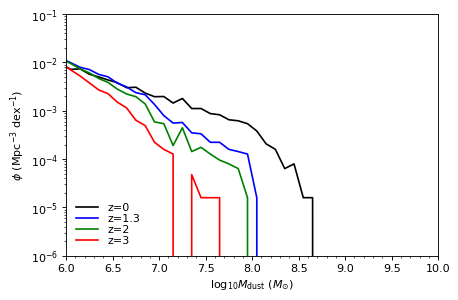

In [80]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

binwidth = 0.1  # mass function histogram bin width

###### z=0

w = np.where(G_history[0].ColdDust > 0.0)[0]
mass = np.log10(G_history[0].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)


(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='z=0')

###### z=1.3

w = np.where(G_history[1].ColdDust > 0.0)[0]
mass = np.log10(G_history[1].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)


(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'b-', label='z=1.3')

###### z=2

w = np.where(G_history[2].ColdDust > 0.0)[0]
mass = np.log10(G_history[2].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)


(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 /binwidth, 'g-', label='z=2')

###### z=3

w = np.where(G_history[3].ColdDust > 0.0)[0]
mass = np.log10(G_history[3].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)


(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'r-', label='z=3')

######        

plt.yscale('log', nonposy='clip')

plt.axis([6.0, 10.0, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc='lower left', numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/DustMassFunction_z-mini.png')

## Dust rate density evolution

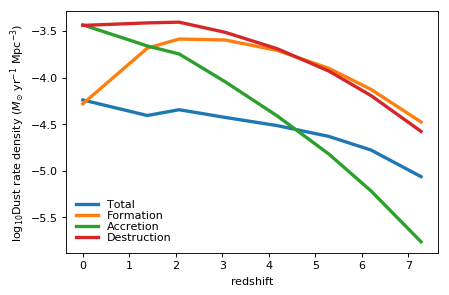

In [81]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

total_density = np.zeros((len(redshift)))
formation = np.zeros((len(redshift)))
accretion = np.zeros((len(redshift)))
destruction = np.zeros((len(redshift)))

for snap in range(len(redshift)):
    formation[snap] = sum(G_history[snap].dustdotform) / (BoxSize/Hubble_h)**3
    accretion[snap] = sum(G_history[snap].dustdotgrowth) / (BoxSize/Hubble_h)**3
    destruction[snap] = sum(G_history[snap].dustdotdestruct) / (BoxSize/Hubble_h)**3
    total_density[snap] = formation[snap]+accretion[snap]-destruction[snap]

z = np.array(redshift)
plt.plot(z, np.log10(total_density), lw=3.0, label='Total')
plt.plot(z, np.log10(formation), lw=3.0, label='Formation')
plt.plot(z, np.log10(accretion), lw=3.0, label='Accretion')
plt.plot(z, np.log10(destruction), lw=3.0, label='Destruction')

plt.ylabel(r'$\log_{10} \mathrm{Dust\ rate\ density}\ (M_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

leg = plt.legend(loc=0, numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/DustRateEvolution_z-mini.png')

## Dust Mass Density Evolution

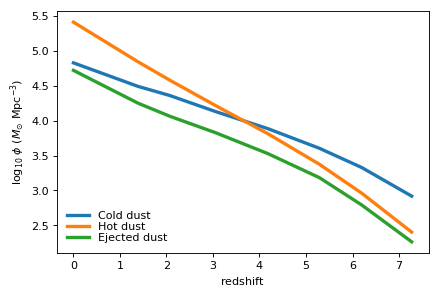

In [82]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

Cold = np.zeros((len(redshift)))
Hot = np.zeros((len(redshift)))
Ejected = np.zeros((len(redshift)))

for snap in range(len(redshift)):
    Cold[snap] = sum(G_history[snap].ColdDust) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
    Hot[snap] = sum(G_history[snap].HotDust) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
    Ejected[snap] = sum(G_history[snap].EjectedDust) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
z = np.array(redshift)

plt.plot(z, np.log10(Cold), lw=3.0, label='Cold dust')
plt.plot(z, np.log10(Hot), lw=3.0, label='Hot dust')
plt.plot(z, np.log10(Ejected), lw=3.0, label='Ejected dust')

plt.ylabel(r'$\log_{10}\ \phi\ (M_{\odot}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

leg = plt.legend(loc='lower left', numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/DustMassDensity_z-mini.png')

In [ ]:
ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0)
ax1 = divider.append_axes("right", size="100%",sharey=ax0)
ax2 = divider.append_axes("right", size="100%",sharey=ax0)
plt.setp(ax1.get_yticklabels() + ax2.get_yticklabels(), visible=False)
w = np.where(G_history[0].ColdGas > 0)[0]
if(len(w) > dilute): w = sample(list(w), dilute)
    
cg = G_history[0].ColdGas[w] * 1.e10 /Hubble_h
area = np.pi * (3 * G_history[0].DiskRadius[w] * 1e6)**2
sfr = G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]
sigma_sfr = sfr/area
sigma_HI = G_history[0].f_HI[w] * cg/area
sigma_H2 = G_history[0].f_H2[w] * cg/area
sigma_g = cg/area

ax0.plot(sigma_HI, sigma_sfr, '.', markersize=1)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel(r'$\dot{\Sigma}$ ($M_{\odot}{yr}^{-1}{kpc}^{-2}$)')
ax0.set_xlabel(r'$\Sigma_{HI}$ ($M_{\odot}{kpc}^{-2}$)')
#ax0.set_xlim(0.6, 150)
#ax0.set_ylim(2e-8, 160)

ax1.plot(sigma_H2, sigma_sfr, '.', markersize=1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\Sigma_{H2}$ ($M_{\odot}{kpc}^{-2}$)')
#ax1.set_xlim(6e-6, 150)

ax2.plot(sigma_H2, sigma_g, '.', markersize=1)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$\Sigma_{g}$ ($M_{\odot}{kpc}^{-2}$)')
#ax2.set_xlim(6e-6, 150)

#plt.savefig('plots/gasdensity-millennium.png')

In [ ]:
import matplotlib.cm as cm
plt.figure()  # New figure

w = np.where((G_snap1.ColdGas > 0) & (G_snap1.MetalsColdGas > 0))[0]   
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
cg = (G_snap1.ColdGas[w] * 1.e10 /Hubble_h) / area
print(cg)
f_H2 = G_snap1.f_H2[w]
metals = np.log10(G_snap1.MetalsColdGas[w] / G_snap1.ColdGas[w])
print(metals)
y = np.where(metals > -1.5)[0]

plt.scatter(cg/area, np.log10(f_H2), s=1, c=metals, cmap=cm.inferno)
cbar = plt.colorbar()
cbar.ax.set_ylabel('log Z')
plt.ylim(-2.5, 0)
plt.xlim(1e-9, 1e-4)
plt.xscale('log')
plt.xlabel(r'$\Sigma_g$ (M$_{\odot}{pc}^{-2})$')
plt.ylabel(r'log$_{10}$f$_{H2}$')
plt.savefig('plots/H2-gas-KMTb.png')
#plt.show()

In [ ]:
w = np.where(G_snap1.f_HI > 0)[0]
k = 1.38e-23
g = 1.989e43
cm = 3.08568e24
s = 3.08568e19

if(len(w) > dilute): w = sample(list(w), dilute)
fraction = G_snap1.f_H2[w]/G_snap1.f_HI[w]
pressure = (G_snap1.Pressure[w]*g/(cm*(s**2))/10)*1e-6/k
plt.plot(pressure, fraction, '.')
plt.ylim(0.05, 110)
plt.xlim(5e7, 1e12)
plt.xlabel(r'Pressure (Pa)')
plt.ylabel(r'f$_{H2}$/f$_{HI}$')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('plots/pressure-millennium.png')

In [ ]:
import matplotlib.cm as cm
plt.figure()  # New figure


w = np.where((G_snap1.ColdGas > 0) & (G_snap1.MetalsColdGas > 0))[0]   
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
cg = (G_snap1.ColdGas[w] * 1.e10 /Hubble_h) 
print(cg)
f_H2 = G_snap1.f_H2[w]

plt.scatter(cg, np.log10(f_H2), s=1)

plt.ylim(-8.0, 0)
plt.xlim(1e6, 1e11)
plt.xscale('log')
plt.xlabel(r'$M_g$ (M$_{\odot})$')
plt.ylabel(r'log f$_{H2}$')
plt.savefig('plots/full-KMT-1.png')
#plt.show()

In [ ]:
w = np.where((G_snap1.DiskRadius > 0) & (G_snap1.ColdGas > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
yy = (G_snap1.StellarMass[w] * 1.e10 / Hubble_h) 
xx = G_snap1.f_H2[w] * (G_snap1.ColdGas[w] * 1.e10 / Hubble_h) 
plt.scatter(xx, yy, s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$M_{\mathrm{*}}\ (M_{\odot})$')  # and the x-axis labels
plt.xlabel(r'$f_{H2} M_g (M_{\odot})$')
plt.ylim(1e7, 1e12)
plt.xlim(1e6, 1e11)
plt.savefig('plots/SFR-BR6.png')

In [ ]:
w = np.where((G_snap1.DiskRadius > 0) & (G_snap1.ColdGas > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
yy = (G_snap1.StellarMass[w] * 1.e10 / Hubble_h)
xx = (G_snap1.ColdGas[w] * 1.e10 / Hubble_h)
plt.plot(xx, yy, '.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
seed(537675868)
A = list(np.arange(100))
print(sample(A, 10), sample(A, 10))

In [ ]:
w = np.where(G_history[0].ColdDust >